# Equilibrium Climate Sensitivity - Distribution Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, cauchy, lognorm
import os 
os.chdir(os.getcwd())

values=np.array([0, 1.5, 2.5, 3.1 ,4.5, 6])
prob=np.array([0, 0.1, 0.33, 0.5 ,0.8, 0.95])

t = np.linspace(0,20, 2000) 

## Normal Distribution

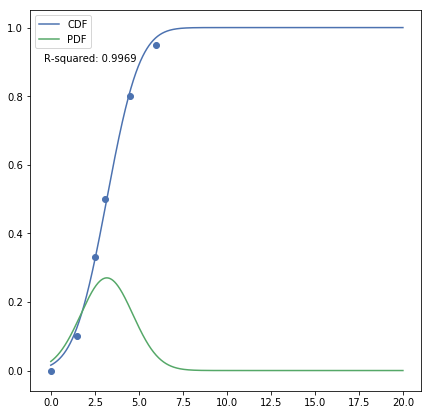

In [2]:
from scipy.optimize import curve_fit

mu,sigma = curve_fit(norm.cdf, values, prob, p0=[3,2])[0]

residuals = prob - norm.cdf(values, mu, sigma)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((prob-np.mean(prob))**2)

r_squared = 1 - (ss_res / ss_tot)

fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-deep')
plt.plot(t, norm.cdf(t, mu, sigma), alpha=1, label = 'CDF')
plt.plot(t, norm.pdf(t, mu, sigma), alpha=1, label = 'PDF')
plt.text(-0.4,0.9,'R-squared: '+ str(round(r_squared,4)))
plt.scatter(values, prob)
plt.legend()
fig.savefig('NormalFit.png', dpi=fig.dpi)

### Random Sampling

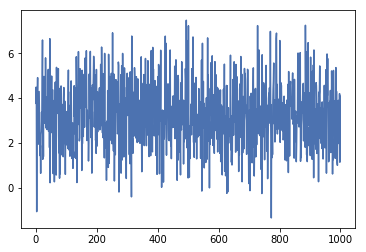

In [3]:
throws = (norm.rvs(mu,sigma,1000))
plt.plot(throws)

### Law of large numbers

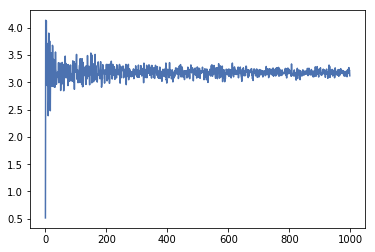

In [4]:
results = []
for num_throws in range(1,1000):
    throws = (norm.rvs(loc=mu,scale=sigma,size=num_throws))
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
    
plt.plot(results)

In [5]:
norm.median(mu, sigma)

3.1812633484969313

In [6]:
norm.stats(mu, sigma, moments='mvsk')

(array(3.18126335), array(2.18008311), array(0.), array(0.))

## Skewnormal Distribution

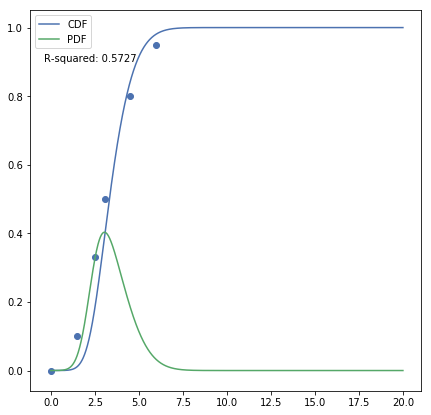

In [7]:
a, sigma1, mu1 = curve_fit(skewnorm.cdf, values, prob, p0=[2,0.6,2])[0]

residuals = prob - skewnorm.cdf(values, a=a, loc=mu, scale=sigma)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((prob-np.mean(prob))**2)

r_squared = 1 - (ss_res / ss_tot)

fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-deep')
plt.plot(t, skewnorm.cdf(t, a, mu1, sigma1), alpha=1, label = 'CDF')
plt.plot(t,skewnorm.pdf(t, a = a, scale = sigma1, loc=mu1), label = 'PDF')
plt.text(-0.4,0.9,'R-squared: '+ str(round(r_squared,4)))
plt.scatter(values, prob)
plt.legend()
fig.savefig('SkewNormalFit.png', dpi=fig.dpi)

### Random Sampling

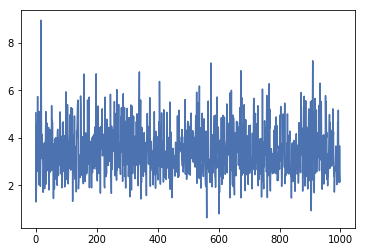

In [8]:
throws = (skewnorm.rvs(a, scale=sigma1,loc=mu1,size=1000))
plt.plot(throws)

### Law of large numbers

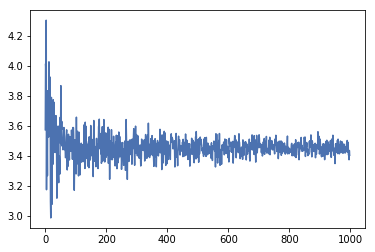

In [9]:
results = []
for num_throws in range(1,1000):
    throws = (skewnorm.rvs(a,loc=mu1,scale=sigma1,size=num_throws))
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
    
plt.plot(results)

In [10]:
skewnorm.median(a, sigma1, mu1)

3.104504798176122

In [11]:
skewnorm.stats(a, sigma1, mu1, moments='mvsk')

(array(3.28053962), array(2.26776735), array(0.60984995), array(0.45235924))

## Lognormal Distribution

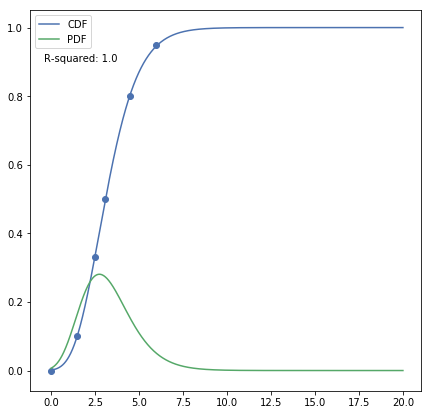

In [12]:
shp, mu2, sigma2 = curve_fit(lognorm.cdf, values, prob, p0=[1,3,1])[0]

residuals = prob - lognorm.cdf(values, s=shp, loc=mu2, scale=sigma2)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((prob-np.mean(prob))**2)

r_squared = 1 - (ss_res / ss_tot)

fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-deep')
plt.plot(t,lognorm.cdf(t, shp, mu2, sigma2), alpha=1, label = 'CDF')
plt.plot(t,lognorm.pdf(t, shp, mu2, sigma2), label = 'PDF')
plt.text(-0.4,0.9,'R-squared: '+ str(round(r_squared,4)))
plt.scatter(values, prob)
plt.legend()
fig.savefig('LogNormalFit.png', dpi=fig.dpi)

### Random Sampling

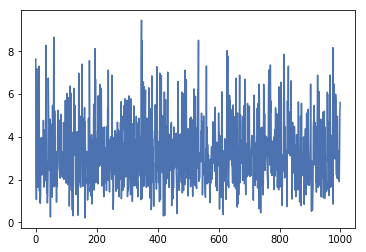

In [13]:
throws = (lognorm.rvs(shp, mu2, sigma2,size=1000))
plt.plot(throws)

### Law of large numbers

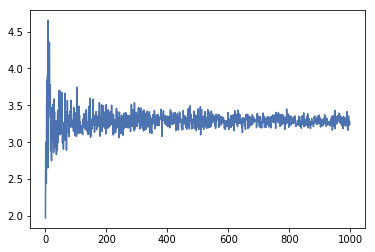

In [14]:
results = []
for num_throws in range(1,1000):
    throws = (lognorm.rvs(shp, mu2, sigma2,size=num_throws))
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
    
plt.plot(results)

In [15]:
lognorm.median(shp, mu2, sigma2)

3.1082563608335176

In [16]:
lognorm.stats(shp, mu2, sigma2, moments='mvsk')

(array(3.29044422), array(2.34689945), array(0.76192899), array(1.0496959))

## Cauchy Distribution

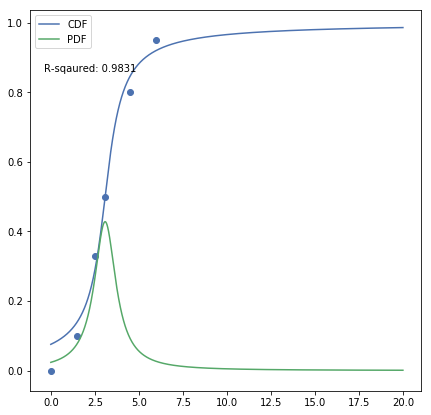

In [17]:
c, s = curve_fit(cauchy.cdf, values, prob, p0=[3,1])[0]

residuals = prob - cauchy.cdf(values, loc=c, scale=s)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((prob-np.mean(prob))**2)

r_squared = 1 - (ss_res / ss_tot)

fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-deep')
plt.plot(t, cauchy.cdf(t, c, s), alpha=1, label='CDF')
plt.plot(t,cauchy.pdf(t, c, s), label ='PDF')
plt.text(-0.4,0.86,'R-sqaured: '+ str(round(r_squared,4)))
plt.scatter(values, prob)
plt.legend()
fig.savefig('CauchyFit.png', dpi=fig.dpi)

### Random Sampling

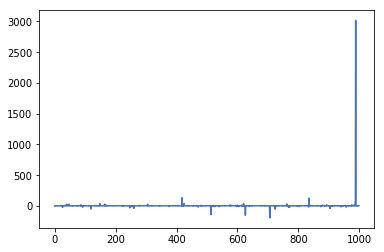

In [18]:
throws = cauchy.rvs(c,s,1000)
plt.plot(throws)

### Law of large numbers

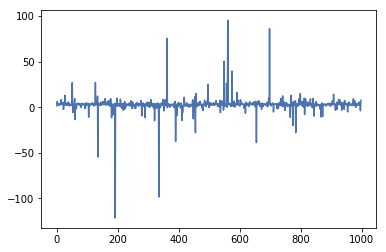

In [19]:
results = []
for num_throws in range(1,1000):
    throws = (cauchy.rvs(c,s,num_throws))
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
    
plt.plot(results)

In [20]:
cauchy.median(c, s)

3.084700906480761

In [21]:
cauchy.stats(c, s, moments='mvsk')

(array(nan), array(nan), array(nan), array(nan))

We need to send bounds so that absolutely crazy values like 500 is not possible.

In [22]:
d = {'norm' : (mu, sigma), 'skewnorm' : (a, mu1, sigma1), 
        'lognorm' : (shp, mu2, sigma2), 'cauchy': (c, s)}

In [23]:
import json

with open('ecs_dist_v4.json', 'w') as f:
    json.dump(d, f)

## Random Sampling

In [24]:
import json
import scipy.stats 

In [25]:
with open('ecs_dist_v4.json') as f:
    d=json.load(f)

max_b = 20
min_b = 0
#creating a list from the dist of t2xC02
np.random.seed(10)
samples_norm = (norm.rvs(d['norm'][0],d['norm'][1],1000))
samples_lognorm = (lognorm.rvs(d['lognorm'][0],d['lognorm'][1],d['lognorm'][2],1000))
samples_cauchy = (cauchy.rvs(d['cauchy'][0],d['cauchy'][1],1000))

#set a lower bound at 0
#samples_norm = [x if x>0 else 0.001 for x in samples_norm]
#samples_lognorm = [x if x>0 else 0.001 for x in samples_lognorm]
#samples_lognorm = [x if x<20 else 20 for x in samples_lognorm]
#samples_cauchy = [x if x>0 else 0.001 for x in samples_cauchy]
#samples_cauchy = [x if x<20 else 20 for x in samples_cauchy]

#samples_norm.append(2.9)
#samples_lognorm.append(2.9)
#samples_cauchy.append(2.9)

#samples_t2xco2 = []
#samples_t2xco2.append(samples_norm)
#samples_t2xco2.append(samples_lognorm)
#samples_t2xco2.append(samples_cauchy)

In [26]:
np.median(samples_norm),np.median(samples_lognorm),np.median(samples_cauchy)

(3.146602538104239, 3.1157503967324574, 3.048284216316145)

(array([  6.,   4.,   2.,  43., 928.,  11.,   3.,   2.,   0.,   1.]),
 array([-80.67033093, -60.96344437, -41.25655782, -21.54967126,
         -1.8427847 ,  17.86410185,  37.57098841,  57.27787497,
         76.98476152,  96.69164808, 116.39853464]),
 <a list of 10 Patch objects>)

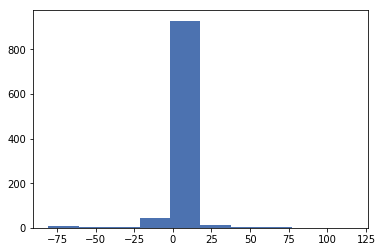

In [27]:
plt.hist(samples_cauchy)

In [28]:
scipy.stats.kurtosis(samples_norm, fisher = False),scipy.stats.kurtosis(samples_lognorm, fisher = False),scipy.stats.kurtosis(samples_cauchy, fisher = False)

(3.092300738990079, 3.3931416381268966, 58.03041124748006)

In [29]:
# import json
# with open('ecs_dist.json') as f:
#     d=json.load(f)

## Rejection Sampling Method

In [30]:
import numpy as np
from scipy.stats import norm, lognorm, cauchy

np.random.seed(10)

minb = 0
maxb = 20
nsamples = 100000

samples_norm = np.zeros((0,))
while samples_norm.shape[0] < nsamples:
    samples = (norm.rvs(d['norm'][0],d['norm'][1],nsamples))
    accepted = samples[(samples >= minb) & (samples <= maxb)]
    samples_norm = np.concatenate((samples_norm, accepted), axis=0)
samples_norm = samples_norm[:nsamples]

samples_lognorm = np.zeros((0,))
while samples_lognorm.shape[0] < nsamples:
    samples = (lognorm.rvs(d['lognorm'][0],d['lognorm'][1],d['lognorm'][2],nsamples))
    accepted = samples[(samples >= minb) & (samples <= maxb)]
    samples_lognorm = np.concatenate((samples_lognorm, accepted), axis=0)
samples_lognorm = samples_lognorm[:nsamples]

samples_cauchy = np.zeros((0,))
while samples_cauchy.shape[0] < nsamples:
    samples = (cauchy.rvs(d['cauchy'][0],d['cauchy'][1],nsamples))
    accepted = samples[(samples >= minb) & (samples <= maxb)]
    samples_cauchy = np.concatenate((samples_cauchy, accepted), axis=0)
samples_cauchy = samples_cauchy[:nsamples]

In [31]:
np.median(samples_norm),np.median(samples_lognorm),np.median(samples_cauchy)

(3.20587884872365, 3.1174823781432064, 3.1604189779616165)

In [32]:
np.var(samples_norm),np.var(samples_lognorm),np.var(samples_cauchy)

(1.984184670266868, 2.3384234060709987, 4.372948666490397)

In [33]:
scipy.stats.skew(samples_norm),scipy.stats.skew(samples_lognorm),scipy.stats.skew(samples_cauchy)

(0.17375426300270644, 0.7784662931753329, 3.2060269135109896)

In [34]:
scipy.stats.kurtosis(samples_norm, fisher = False),scipy.stats.kurtosis(samples_lognorm, fisher = False),scipy.stats.kurtosis(samples_cauchy, fisher = False)

(2.7690095938140806, 4.082964522846915, 18.792093551405024)

(array([12675., 64955., 15293.,  3474.,  1458.,   810.,   518.,   350.,
          246.,   221.]),
 array([7.59919788e-05, 1.99863848e+00, 3.99720098e+00, 5.99576347e+00,
        7.99432596e+00, 9.99288845e+00, 1.19914509e+01, 1.39900134e+01,
        1.59885759e+01, 1.79871384e+01, 1.99857009e+01]),
 <a list of 10 Patch objects>)

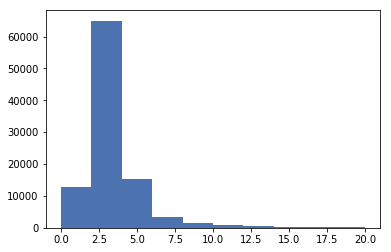

In [35]:
plt.hist(samples_cauchy)

(array([9.6490e+03, 3.6460e+04, 3.3496e+04, 1.4782e+04, 4.2920e+03,
        1.0470e+03, 2.2300e+02, 3.8000e+01, 9.0000e+00, 4.0000e+00]),
 array([3.66842700e-04, 1.48829031e+00, 2.97621378e+00, 4.46413726e+00,
        5.95206073e+00, 7.43998420e+00, 8.92790767e+00, 1.04158311e+01,
        1.19037546e+01, 1.33916781e+01, 1.48796016e+01]),
 <a list of 10 Patch objects>)

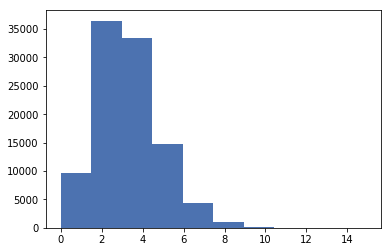

In [36]:
plt.hist(samples_lognorm)